# Assignment: Predicting Future Outcomes

## 1. Introduction

This is the scenario as outlined in the assignment briefing: 

> You are part of a team of data analysts that was contracted by Turtle Games, a game manufacturer and retailer with a global customer base. The company manufactures and sells its own products, along with sourcing and selling products manufactured by other companies. Its product range includes books, board games, video games, and toys. The company collects data from sales as well as customer reviews. Turtle Games has a business objective of improving overall sales performance by utilising customer trends.  

> To improve overall sales performance, Turtle Games has come up with an initial set of questions: 
> * How do customers engage with and accumulate loyalty points?
> * How can customers can be segmented into groups, and which groups can be targeted by the marketing department? 
> * How can text data (e.g. social data such as customer reviews) be used to inform marketing campaigns and make improvements to the business?
> * What trends and insights can be identified from the sales data?
> * Is the sales data suitable for modelling purposes? (Provide a statistical review and interpretation (e.g. normal distribution, skewness, or kurtosis) to justify the answer.)
> * Are there any possible relationships between North American, European, and global sales? (If yes, please provide a description.)




## 2. Goal


> To provide answers to all of the above questions and provide a complete Notebook, technical report and presentation to the client. 

## 3. Data: Collection & Exploration 


## Getting the Data

The data was provided as part of the assignment, downloadable as a csv file: 

**turtle_reviews.csv**: Details on customer gender, age, remuneration, spending score, loyalty points, education, language, platform, review and summary across products.

## Exploring the Data

We can read in the data; and at the same time check whether the data needs cleaning:

In [1]:
# Importing libraries that we will use

# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm 
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [2]:
reviews= pd.read_csv('turtle_reviews.csv')

First, let's take a look at the first few rows of the DataFrame:

In [3]:
# taking a look at the first few rows of the dataframe:

reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


Here are the explanations of what the data is in each column, according to the metadata provided with this dataset:


| **Column**             | **Description**                                                                                                                                |
|:--- |:--- |
| gender                 | The gender of the customer.  |
| age                    | Age of the customer in years.                                                                                                                  |
| remuneration (k£)      | Total income per customer per year, in pounds, where k=1000.                                                                                   |
| spending_score (1-100) | A score is assigned to the customer by Turtle Games based on the customer’s spending nature and behaviour. The value ranges between 1 and 100. |
| loyalty_points         | A score based on the point value of the purchase,converting the monetary value to point value,and the point value of an action (purchase)      |
| education              | Level of qualification that the customer obtained.                                                                                             |
| language               | All the reviews were in English.                                                                                                               |
| platform               | All the reviews were obtained from the website of Turtle Games.                                                                                |
| product                | Unique code allocated to product based on the item description.                                                                                |
| review                 | Online reviews submitted by customers who purchased and used the products.                                                                     |
| summary                | Summary of the customer’s review                                                                                                               |

Next, let's run reviews.info() to have a look at the number of values in each column, whether there are any null values and to see if the data types are what we would expect:

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


We note that there are no null value and the data types appear to be what we would expect for each column. 

Finally, let's take a look at some summary statistics:

In [5]:
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


From eyeballing the above statistics, there are no immediate issues or anomalies that jump out. 

## Cleaning the Data


Fortunately, we have a nice, clean dataset, so very little cleaning is required! It would be a good idea to change a couple of the column names however, in order to remove whitespace:

In [6]:
reviews.rename(columns={"remuneration (k£)": "remuneration", "spending_score (1-100)": "spending_score"},inplace=True)


In [7]:
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


Based on the description in the metadata, it appears that two of the columns are redundant: 

* `language`: since 'All reviews were in English', so we should find 'EN' in every row for this column.

* `platform`: since 'All the reviews were obtained from the website of Turtle Games', so we should find 'Web' listed for every row in the 'platform' column.

Let's check that the above is the case:

In [8]:
reviews['language'].value_counts()

EN    2000
Name: language, dtype: int64

In [9]:
reviews['platform'].value_counts()

Web    2000
Name: platform, dtype: int64

It is the case that these columns are redundant, so we can drop them:

In [10]:
reviews.drop(axis=1, columns=['language', 'platform'],inplace=True)

In [11]:
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [12]:
# checking for duplicate rows
reviews.duplicated().value_counts()

False    2000
dtype: int64

# 5. Analysis


## 5.1 Linear Regression

Let's begin with the first question, namely:

* How do customers engage with and accumulate loyalty points?

To explore this, we will perform a linear regression analysis to evaluate possible linear relationships between loyalty points and age/remuneration/spending scores to determine whether these are good predictor for loyalty points: 

In [13]:
# The dependent variable in our analysis is 'loyalty points':

dependent_variable=reviews['loyalty_points']

### Spending vs Loyalty

In [14]:
#the independent variable in this case is 'spending_score':

independent_variable_spending_score=reviews['spending_score']

In [15]:
# OLS model and summary.
f= 'dependent_variable ~ independent_variable_spending_score'
test= ols(f,data=reviews).fit()

In [16]:
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dependent_variable   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          2.92e-263
Time:                        15:11:39   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             -75.0527     45.931     -1.634      0.102    -165.129      15.024
independent_variable_spending_score    33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see from the R-squared value above that 45% of the variation in the dependent variable `loyalty points` is explained by the variation in `independent_variable_spending_score`.

In [17]:
print('Parameters: \n\n', test.params,'\n')

print('Standard errors: \n\n', test.bse,'\n')

print('Predicted values: \n\n', test.predict())

Parameters: 

 Intercept                             -75.052663
independent_variable_spending_score    33.061693
dtype: float64 

Standard errors: 

 Intercept                              45.930554
independent_variable_spending_score     0.814419
dtype: float64 

Predicted values: 

 [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


We can see that the coefficient of `independent_variable_spending_score` is 33.06, meaning that for that for every one unit increase of `independent_variable_spending_score`, the number of `loyalty_points` increases by 33.06.

In [18]:
# Set the X coefficient and the constant to generate the regression table.

y_pred= (-75.052663) + 33.061693 * reviews['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

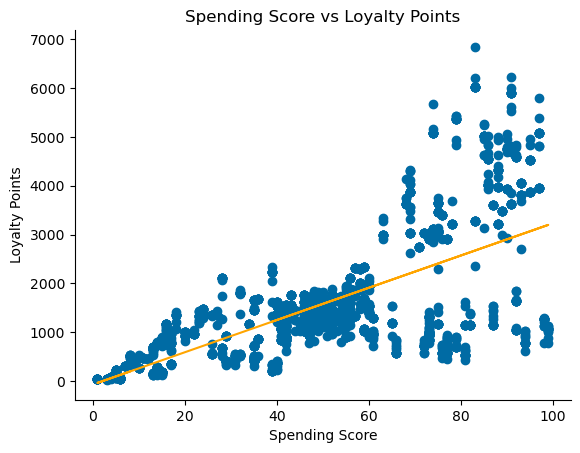

<Figure size 1000x600 with 0 Axes>

In [19]:
#Now, let's create a scatterplot, with regression line:

#setting the color palette to one that is helpful to people with colorblindness:
plt.style.use('tableau-colorblind10')

#plotting the scatterplot:
plt.scatter(independent_variable_spending_score,dependent_variable)

#adding the regression line
plt.plot(independent_variable_spending_score,y_pred, color='orange')
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.title("Spending Score vs Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")
plt.figure(figsize=(10,6))
plt.show()

### Remuneration vs Loyalty

In [20]:
#the independent variable in this case is 'remuneration':

independent_variable_remuneration=reviews['remuneration']


In [21]:
# OLS model and summary.
f= 'dependent_variable ~ independent_variable_remuneration'
test= ols(f,data=reviews).fit()

In [22]:
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dependent_variable   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          2.43e-209
Time:                        15:11:39   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -65.6865     52.171     -1.259      0.208    -168.001      36.628
independent_variable_remuneration    34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see from the R-squared value above that 38% of the variation in the dependent variable `loyalty points` is explained by the variation in `independent_variable_remuneration`.

In [23]:
print('Parameters: \n\n', test.params,'\n')

print('Standard errors: \n\n', test.bse,'\n')

print('Predicted values: \n\n', test.predict())

Parameters: 

 Intercept                           -65.686513
independent_variable_remuneration    34.187825
dtype: float64 

Standard errors: 

 Intercept                            52.170717
independent_variable_remuneration     0.977925
dtype: float64 

Predicted values: 

 [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


We can see that the coefficient of `independent_variable_remuneration` is 34.19, meaning that for that for every one unit increase of `independent_variable_remuneration`, the number of `loyalty_points` increases by 34.19.

In [24]:
# Set the X coefficient and the constant to generate the regression table.

y_pred= (-65.6865) + 34.1878 * reviews['remuneration']

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

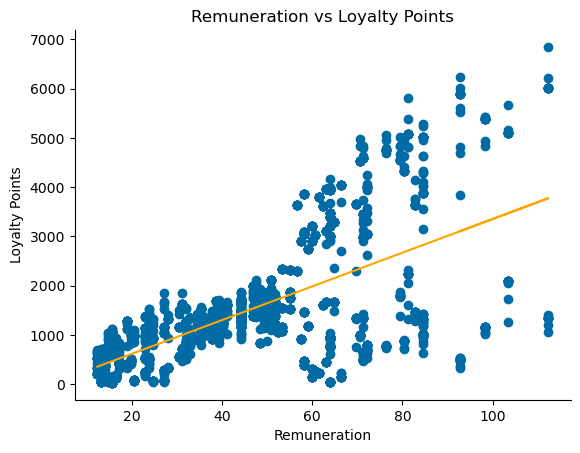

<Figure size 1000x600 with 0 Axes>

In [25]:
#Now, let's create a scatterplot, with regression line:

#setting the color palette to one that is helpful to people with colorblindness:
plt.style.use('tableau-colorblind10')

#plotting the scatterplot:
plt.scatter(independent_variable_remuneration,dependent_variable)

#adding the regression line
plt.plot(independent_variable_remuneration,y_pred, color='orange')
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.title("Remuneration vs Loyalty Points")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")
plt.figure(figsize=(10,6))
plt.show()

### Age vs Loyalty

In [26]:
#the independent variable in this case is 'age':

independent_variable_age=reviews['age']


In [27]:
# OLS model and summary.
f= 'dependent_variable ~ independent_variable_age'
test= ols(f,data=reviews).fit()

In [28]:
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dependent_variable   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 01 Mar 2024   Prob (F-statistic):             0.0577
Time:                        15:11:39   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1736.5177     88.249     19.678      0.000    1563.449    1909.587
independent_variable_age    -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see from the R-squared value above that 0.2% of the variation in the dependent variable `loyalty points` is explained by the variation in `age`.

In [29]:
print('Parameters: \n\n', test.params,'\n')

print('Standard errors: \n\n', test.bse,'\n')

print('Predicted values: \n\n', test.predict())

Parameters: 

 Intercept                   1736.517739
independent_variable_age      -4.012805
dtype: float64 

Standard errors: 

 Intercept                   88.248731
independent_variable_age     2.113177
dtype: float64 

Predicted values: 

 [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


We can see that the coefficient of `independent_variable_age` is -4.01, meaning that for that for every one unit increase of `independent_variable_remuneration`, the number of `loyalty_points` decreases by -4.01.

In [30]:
# Set the X coefficient and the constant to generate the regression table.

y_pred= (1736.517739) + -4.012805 * reviews['age']

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

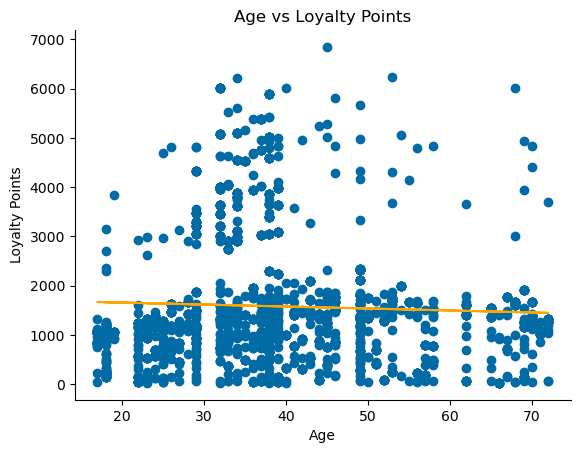

<Figure size 1000x600 with 0 Axes>

In [31]:
#Now, let's create a scatterplot, with regression line:

#setting the color palette to one that is helpful to people with colorblindness:
plt.style.use('tableau-colorblind10')

#plotting the scatterplot:
plt.scatter(independent_variable_age,dependent_variable)

#adding the regression line
plt.plot(independent_variable_age,y_pred, color='orange')
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.title("Age vs Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")
plt.figure(figsize=(10,6))
plt.show()

### Observations and Insights

From the analysis above, we can rank the independent variables as follows in terms of how much of the variation in loyality points each accounts for: 

* spending_score variation accounts for 45% of the variation in loyalty points
* remuneration variation accounts for 38% of the variation in loyalty points
* age variation accounts for 0.2% of the variation in loyalty points

Neither spending_score or remuneration are perfect predictors of loyalty points, accounting for under half of the variation, but they do at least have some value as a predictor. We can also see that as spending_score increases by one, loyalty_points increases by 33.06, so there is a positive relationship here; and as remuneration increases by one unit, loyality_points increase by 34.19, so there is also a positive relationship here. 

As for `age`, this variable accounts for very little of the variation in loyalty_points (-4.01) and we can see that as age increase by one, the loyality_points slightly decrease (by -4.01).

So let's turn back to the question in hand:

* How do customers engage with and accumulate loyalty points?

From the initial analysis above, we can see that as customers spend more, this increases their loyalty points; that customers with higher remuneration accumulate more loyalty points; and age has very little impact/bearing on the accumulation of points. 

## 5.2 Clustering with k-means

Now let's turn to the second question: 

* How can customers can be segmented into groups, and which groups can be targeted by the marketing department?

To answer this question, we need to identify groups within the customer base that can be used to target specific market segments. We will focus on the `spending_score` and `remuneration variables`, as we have already established they have some value as predictors for `loyalty_points`.

We will use k-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.


In [32]:
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


Let's begin by visualising `remuneration` versus `spending_score` to determine any correlations and possible groups (clusters).

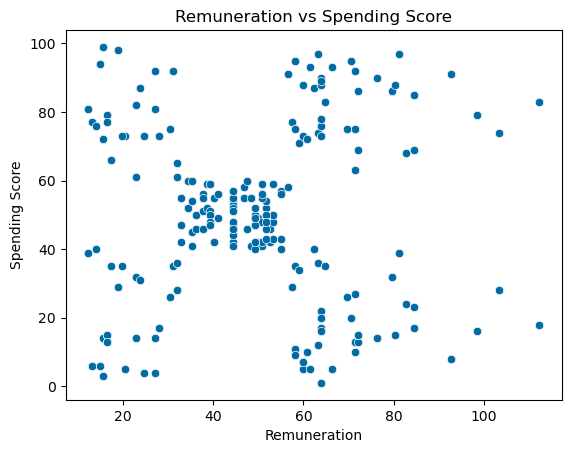

<Figure size 1000x600 with 0 Axes>

In [33]:
sns.scatterplot(data=reviews, x='remuneration',y='spending_score')
plt.title("Remuneration vs Spending Score")
plt.xlabel("Remuneration")
plt.ylabel("Spending Score")
plt.figure(figsize=(10,6))
plt.show()

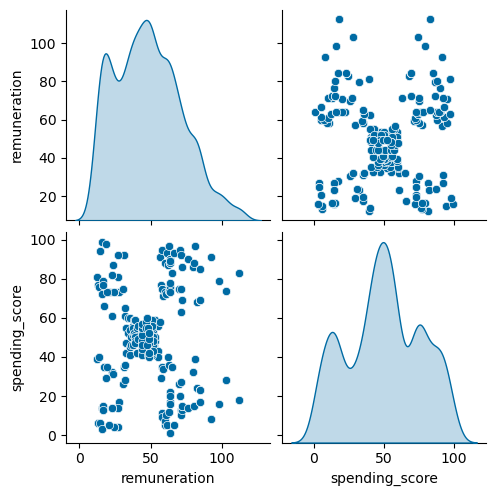

In [34]:
x= reviews[['remuneration','spending_score']]
      
sns.pairplot(data=reviews,
             vars=x,
             diag_kind='kde')



From the above visualisations we can already see there appear to be distinct clusters within the data. 

We will now seek to detemine the optimum number of clusters using the Elbow and Silhouette methods:

In [35]:
from sklearn.cluster import KMeans

In [36]:
KMeans()

KMeans()

In [37]:
ss=[]

for i in range(1,11):
    kmeans= KMeans(n_clusters=i,
                   init='k-means++',
                   max_iter=500,
                   random_state=42, 
                   n_init=10)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

In [38]:
ss

[2430088.5950328037,
 1528052.250275764,
 1006659.3689455047,
 633387.567730502,
 348507.3568197285,
 302096.8179823204,
 256038.6591851416,
 215631.0806904217,
 182962.806988828,
 163540.02593543247]

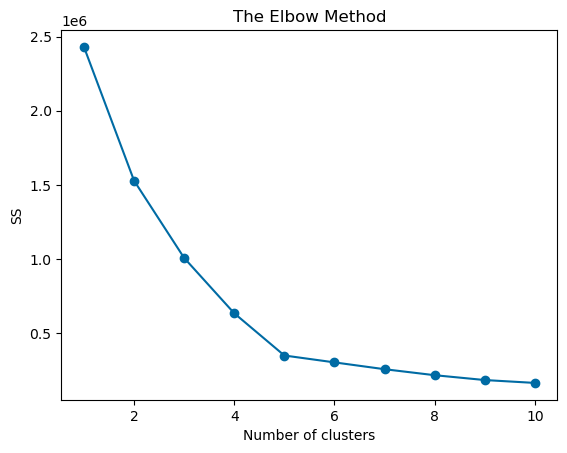

In [39]:
plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

We can see that the 'elbow' point in the above visualisation is at 5 clusters. 

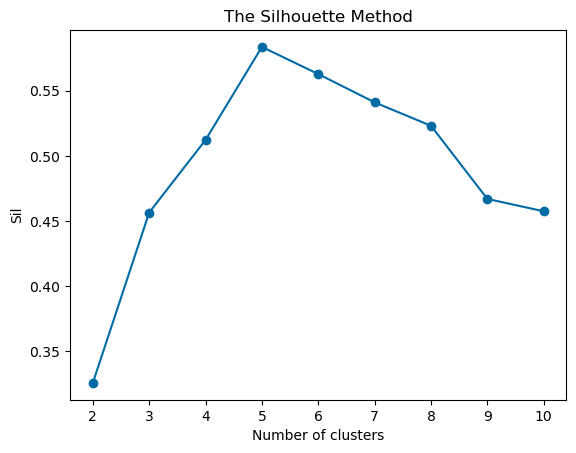

In [40]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

From the above visualisation, we can see that the optimal silhouette score is at 5 clusters. 

Both of these methods therefore suggest that the optimum number of clusters for our analysis is 5.

In [41]:
kmeans= KMeans(max_iter=15000,
              init='k-means++',
              random_state=42,
              n_clusters=5).fit(x)

In [42]:
clusters=kmeans.labels_

In [43]:
x['K-Means Predicted']=clusters

In [44]:
x.head()

,remuneration,spending_score,K-Means Predicted
0,12.30,39,4
1,12.30,81,3
2,13.12,6,4
3,13.12,77,3
4,13.94,40,4


In [45]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

Text(0.5, 1.01, 'Pairplot of Remuneration vs Spending Score, with K-Means Predicted Clusters')

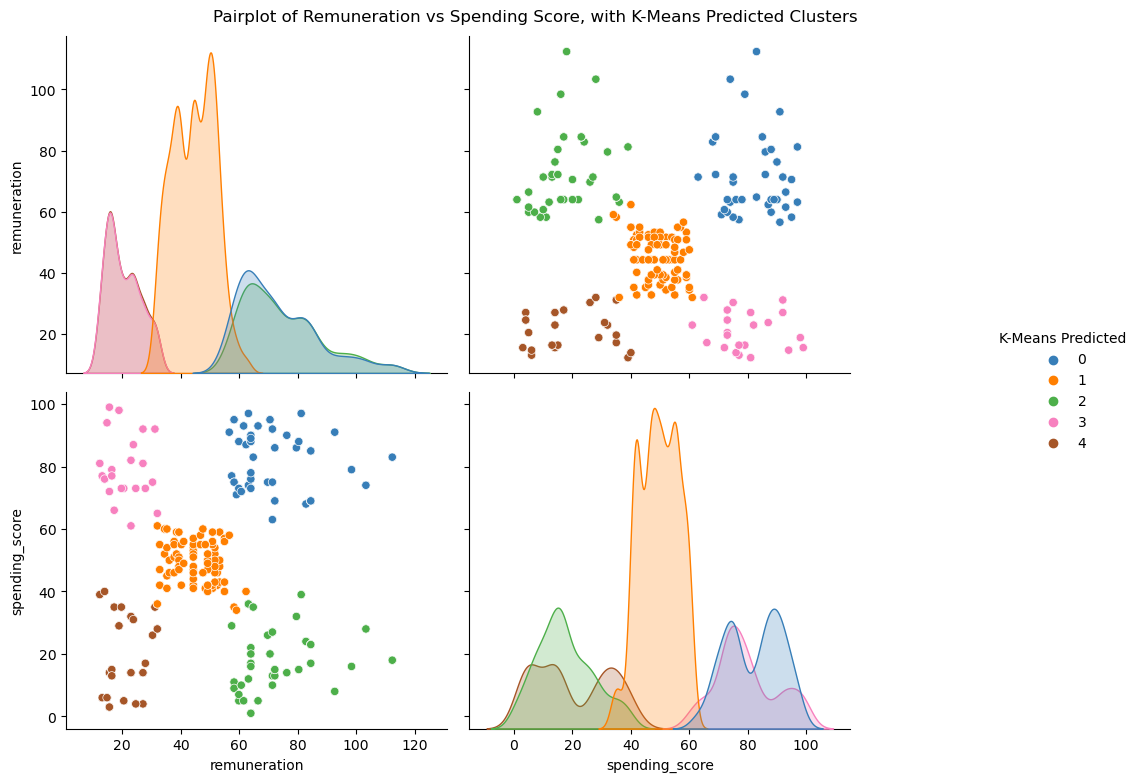

In [46]:
p=sns.pairplot(data=x,
             vars=['remuneration','spending_score'],
             hue='K-Means Predicted',
             diag_kind='kde',
            palette=CB_color_cycle,
            )

p.fig.set_size_inches(12,8)
p.fig.suptitle("Pairplot of Remuneration vs Spending Score, with K-Means Predicted Clusters", y=1.01) # y= some height>1

We can see the five distinct clusters visualised in the above. Let's check how many observations there are in each of the clusters:

In [47]:
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

In [48]:
# View the K-Means predicted.
x.head()

,remuneration,spending_score,K-Means Predicted
0,12.30,39,4
1,12.30,81,3
2,13.12,6,4
3,13.12,77,3
4,13.94,40,4


Text(0.5, 1.0, 'Remuneration vs Spending Score Clusters')

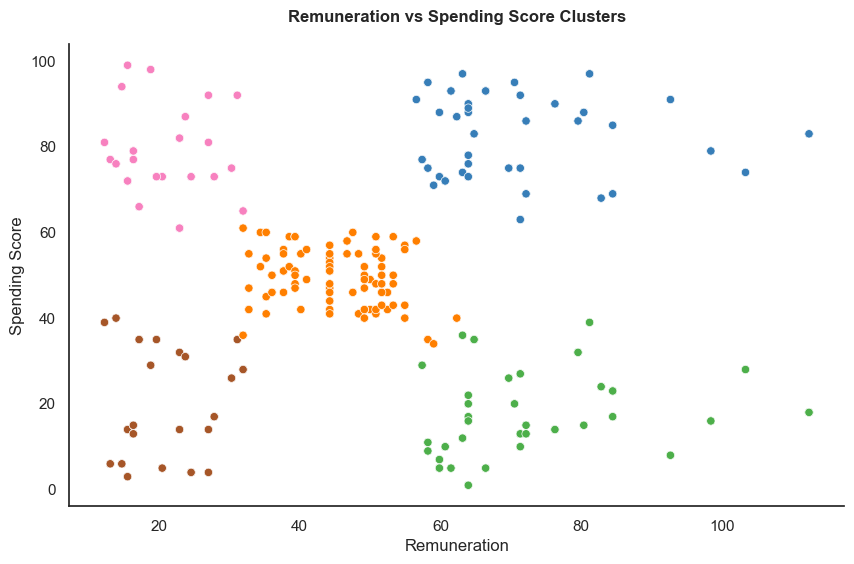

In [49]:
# Visualising the clusters.
# Set plot size.

sns.set(rc = {'figure.figsize':(10, 6)})
sns.set_style("white")
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
               palette=CB_color_cycle,legend=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
#plt.legend(loc='right',labels=['LR, LS','HR,HS','MR,MS','HR,LS','LR, HS'])
 
plt.title('Remuneration vs Spending Score Clusters',
          fontweight = "bold",pad=16)

In [50]:
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

<Axes: xlabel='spending_score', ylabel='remuneration'>

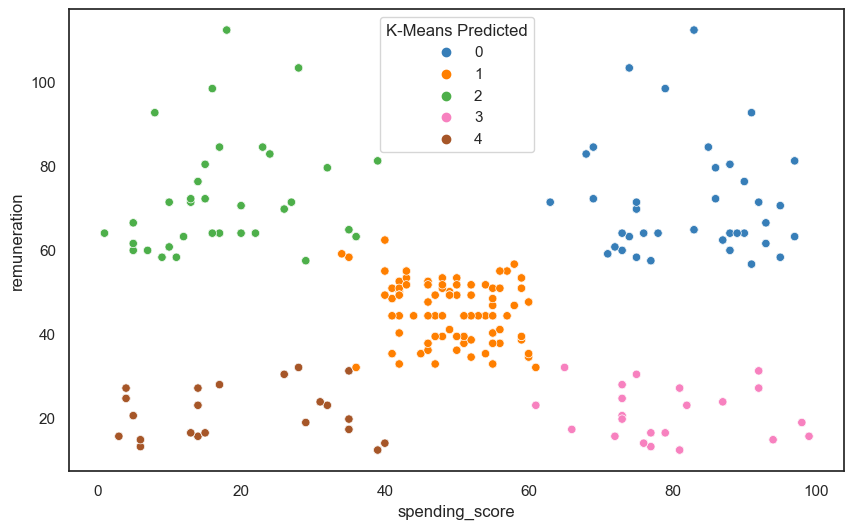

In [51]:
# Visualising the clusters.
# Set plot size.

sns.set(rc = {'figure.figsize':(10, 6)})
sns.set_style("white")
sns.scatterplot(x='spending_score' , 
                y ='remuneration',
                data=x ,
                hue='K-Means Predicted',
               palette=CB_color_cycle)

We can see from the K-means clustering that there are 5 distinct groups and this could help guide the marketing strategy. 

The largest group, with 774 observations is group one, those in the mid-range spending-score (between c.40-60) and the middle range of renumeration (c.38-58). 

The four remaining groups form a matrix: higher renumeration/higher spending_score (356 observations), higher renumeration/lower spending_score (330), lower renumeration/lower spending score (271) and lower renumeration, higher spending score (269). 

The marketing team may wish to condier specific different ways of targeting these different groups for example:

* **higher renumeration/higher spending_score (356 observations)**: this group have the resources, so do not need discounts, and have demostrated that the are willing to buy products, so could be offered premium products and/or membership initiatives, to encourage further spending.
<br>

* **lower renumeration, higher spending score (269)**: this group have fewer resources, but are committed customers. They may not have the resources to spend more, but could be potentially recruited as advocates/ambassadors to help promote the company/products. 
<br>

* **higher renumeration/lower spending_score (330)**: these customers have the resources, but are not spending large amounts. As such, the marketing team may need to consider alternative strategies to entice them, such as looking at partnerships/collaborations with other organisations/brands that may appeal to this group and drive their engagement.
<br>

* **lower renumeration/lower spending score (271)**: this group have fewer resources and are not spending a large amount. This group may respond to discount/offers as a means of increasing their engagment/spending.
<br>

* **mid remuneration/mid spending score (774)**: this is a large group that sits in the middle. The marketing team could try a range of different approaches on this group and see which they respond to the most (for example, they could be segmented into a control group (no action), a discount group (this sub-set are offered discounts) and a premium incentive group (where they are offered premium membership incentives)- it would be interesting to see which approach had the most success with each sub-group. 



## 5.3 Natural Language Processing

The next question we turn to is as follows: 

* How can text data (e.g. social data such as customer reviews) be used to inform marketing campaigns and make improvements to the business?

For this, we will Natural Language Processing (NLP) techniques to analyse the data.

For this analysis, we only need to look at the columns containing text, the `review` and `summary` columns; so let's create a new DataFrame containing just these columns:

In [52]:
text=reviews[['review','summary']]

In [53]:
text.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [54]:
#confirming there are no null values:

text.isna().sum()

review     0
summary    0
dtype: int64

In [55]:
# changing all characters to lower case and joining the elements in each of the columns: 

text['review']= text['review'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
text['summary']= text['summary'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [56]:
text.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


In [57]:
# replacing punctuation in each of the columns respectively:

text['review']= text['review'].str.replace('[^\w\s]','')
text['summary']= text['summary'].str.replace('[^\w\s]','')

In [58]:
text.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


Checking for duplicates and dropping any:

In [59]:
text.review.duplicated().sum()

50

In [60]:
text.summary.duplicated().sum()

649

In [61]:
#first let's drop the duplicates for the 'summary' column:

text= text.drop_duplicates(subset=['summary'])

text.reset_index(inplace=True)

text.shape

(1351, 3)

In [62]:
text.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [63]:
text.summary.duplicated().sum()

0

In [64]:
#now let's drop the duplicates for the 'review' column:

text2= text.drop_duplicates(subset=['review'])

text2.reset_index(inplace=True,drop=True)

text2.shape

(1350, 3)

In [65]:
#confirming there are no duplicates:

text2.review.duplicated().sum()

0

In [66]:
text2.summary.duplicated().sum()

0

In [67]:
text2.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## Highlighting the Most Common Words

Now that we have done some pre-processing, we can look at drawing out some helpful insights using NLP. 

If we were able to identify the most common words used, these could steer the marketing team regarding which words to tag in future post. Let's do this by first creating words clouds of the most common words and visualing them in a bar chart. 


Let's start with a word cloud for the `review` column:

In [68]:
#creating a string containing all the words from the 'review' column:

all_comments= ''

for i in range(text2.shape[0]):
    #Add each comment
    all_comments= all_comments + text2['review'][i]

In [69]:
#importing libraries required

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

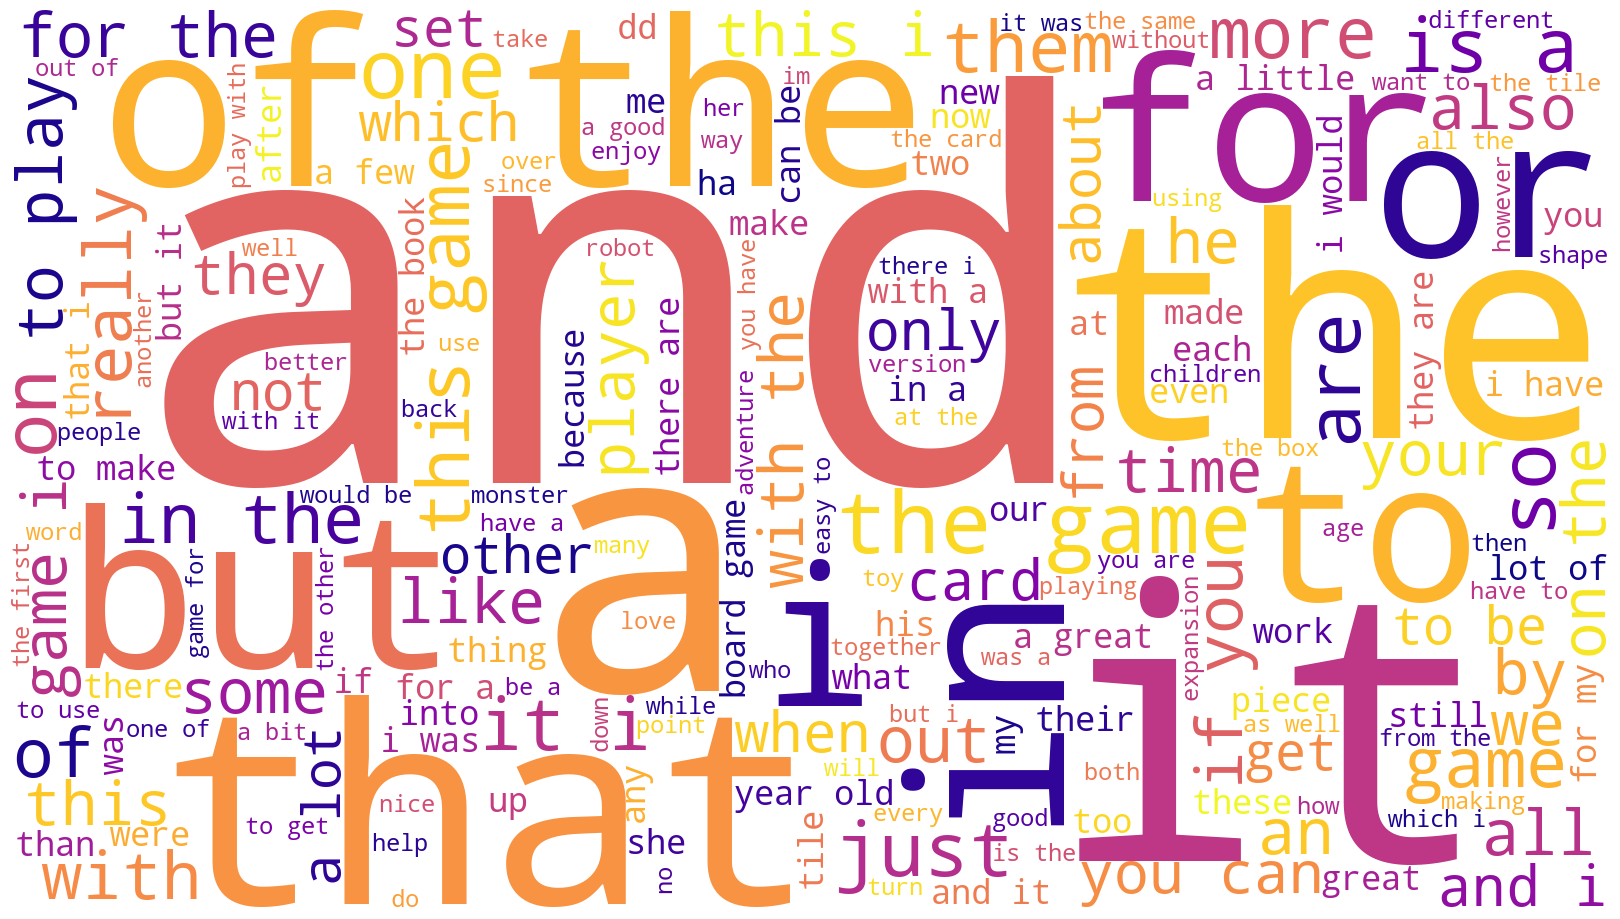

In [70]:
sns.set(color_codes=True)

word_cloud= WordCloud(width= 1600, height= 900,
                     background_color='white',
                     colormap='plasma',
                     stopwords='none',
                     min_font_size=10).generate(all_comments)

plt.figure(figsize=(16,9), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Let's do the same for the `summary` column:

In [71]:
all_comments= ''

for i in range(text2.shape[0]):
    #Add each comment
    all_comments= all_comments + text2['summary'][i]

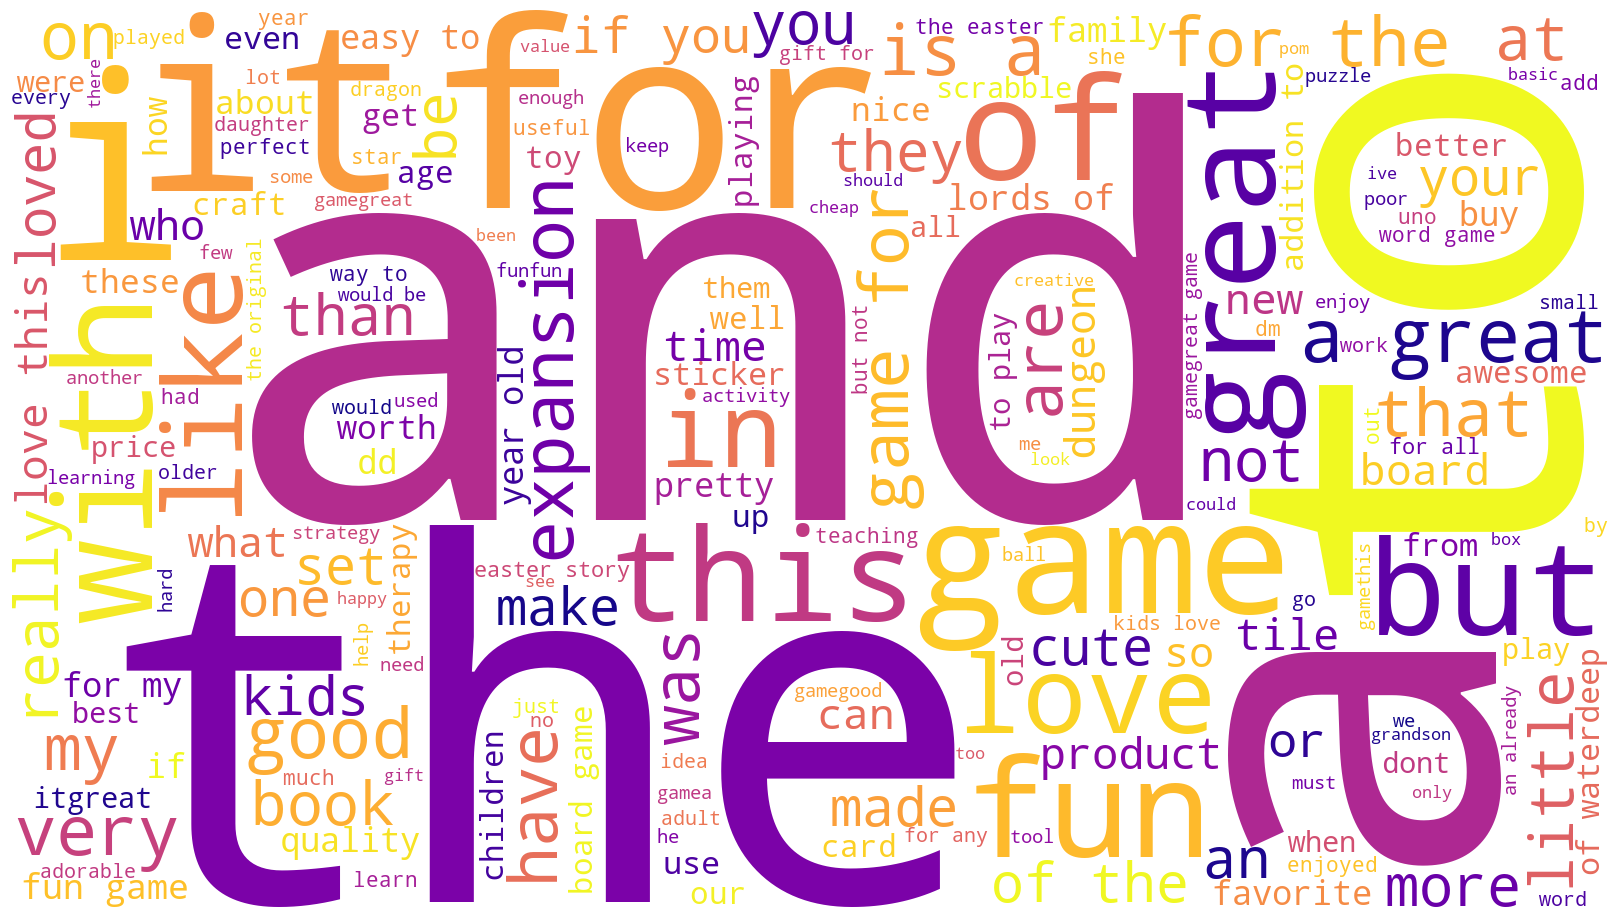

In [72]:
sns.set(color_codes=True)

word_cloud= WordCloud(width= 1600, height= 900,
                     background_color='white',
                     colormap='plasma',
                     stopwords='none',
                     min_font_size=10).generate(all_comments)

plt.figure(figsize=(16,9), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

The word clouds above provide limited insight, as they are dominated by 'stop words'. Let's remove the stop words and visualise again:

In [73]:
#importing required libraries:

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [74]:
#tokenizing the words for each row for the 'review' column:

text2['review_tokens']= text2['review'].apply(word_tokenize)

text2.head()

,index,review,summary,review_tokens
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ..."
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o..."
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ..."


In [75]:
#tokenizing the words for each row for the 'summary' column:

text2['summary_tokens']= text2['summary'].apply(word_tokenize)

text2.head()

,index,review,summary,review_tokens,summary_tokens
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [76]:
#next, we bring all of the tokens from each 'review' row together:

all_review_tokens=[]

for i in range(text2.shape[0]):
    all_review_tokens= all_review_tokens + text2['review_tokens'][i]

In [77]:
#check that we are only using characters and numbers:

all_review_tokens= [word for word in all_review_tokens if word.isalnum()]

In [78]:
# now we create a frequency distribution using the all_review_tokens list:

from nltk.probability import FreqDist

fdist= FreqDist(all_review_tokens)
fdist

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [79]:
# remove any stopwords:

from nltk.corpus import stopwords

In [80]:
english_stopwords= set(stopwords.words('english'))

In [81]:
all_review_tokens2= [x for x in all_review_tokens if x.lower() not in english_stopwords]

In [82]:
#bringing all of the words together into one string:

all_review_tokens2_string= ''

for value in all_review_tokens2:
    all_review_tokens2_string= all_review_tokens2_string+ value + ' '

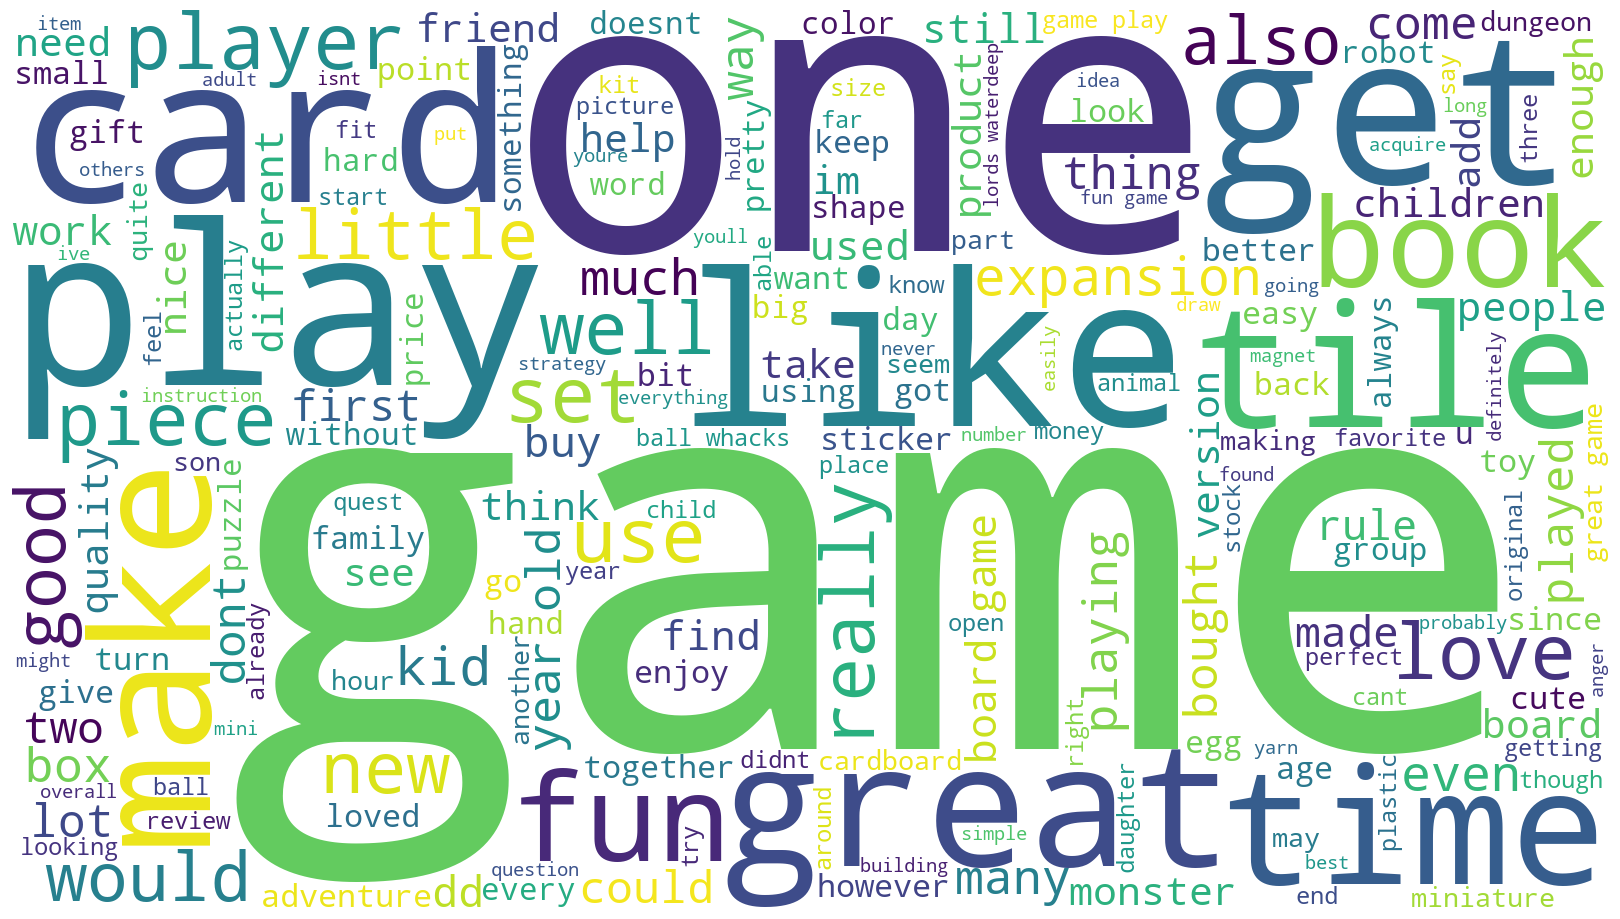

In [151]:
#creating the word cloud, this time without stopwords:

sns.set(color_codes=True)

word_cloud= WordCloud(width= 1600, height= 900,
                     background_color='white',
                     #colormap='plasma',
                     stopwords='none',
                     min_font_size=10).generate(all_review_tokens2_string)

plt.figure(figsize=(16,9), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Let's follow the same steps for the 'summary' tokens:

In [84]:
all_summary_tokens=[]

for i in range(text2.shape[0]):
    all_summary_tokens= all_summary_tokens + text2['summary_tokens'][i]
    

In [85]:
#check that we are only using characters and numbers:

all_summary_tokens= [word for word in all_summary_tokens if word.isalnum()]

In [86]:
from nltk.probability import FreqDist

fdist= FreqDist(all_summary_tokens)
fdist

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

In [87]:
all_summary_tokens2= [x for x in all_summary_tokens if x.lower() not in english_stopwords]

In [88]:
all_summary_tokens2_string= ''

for value in all_summary_tokens2:
    all_summary_tokens2_string= all_summary_tokens2_string+ value + ' '

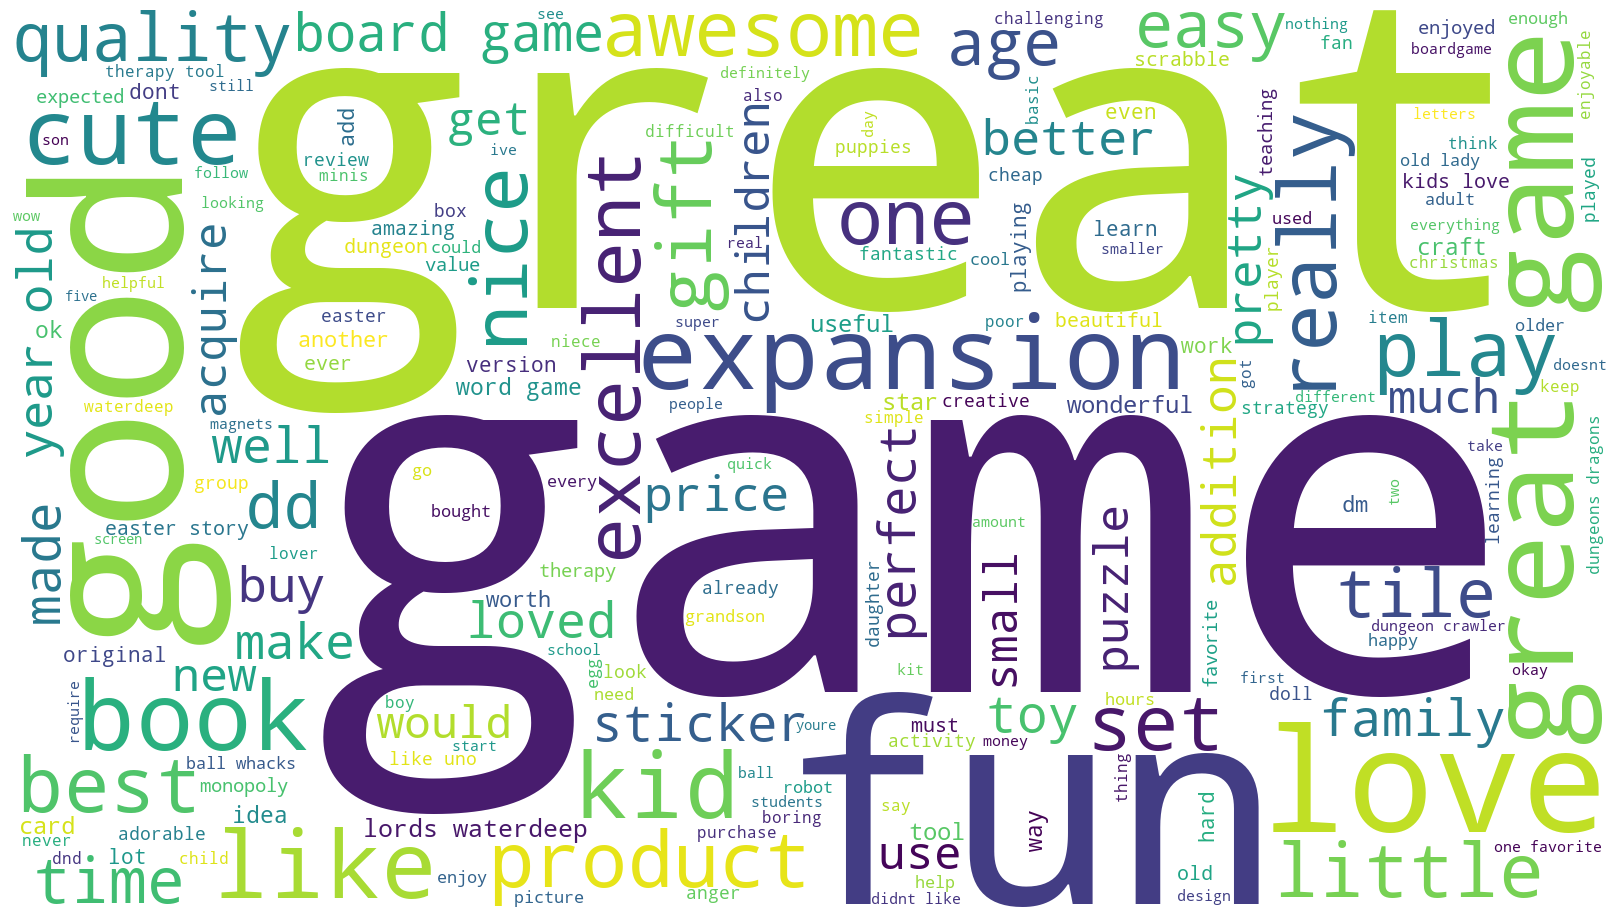

In [89]:
sns.set(color_codes=True)

word_cloud= WordCloud(width= 1600, height= 900,
                     background_color='white',
                     #colormap='plasma',
                     stopwords='none',
                     min_font_size=10).generate(all_summary_tokens2_string)

plt.figure(figsize=(16,9), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

The above word clouds provide a nice visualisation of some of the most common words. As a next step, let's be precise regarding exactly which words are the most common:

In [90]:
from collections import Counter

In [91]:
review_counts= pd.DataFrame(Counter(all_review_tokens2).most_common(15),
                     columns=['Word','Frequency']).set_index('Word')

In [92]:
review_counts

,Frequency
Word,
game,1359
one,475
play,442
fun,407
great,392
like,373
get,293
cards,281
tiles,280


In [93]:
#sorting in ascending order so this is the order they appear in the visualisation:
review_counts_sorted = review_counts.sort_values(by='Frequency', ascending=True)

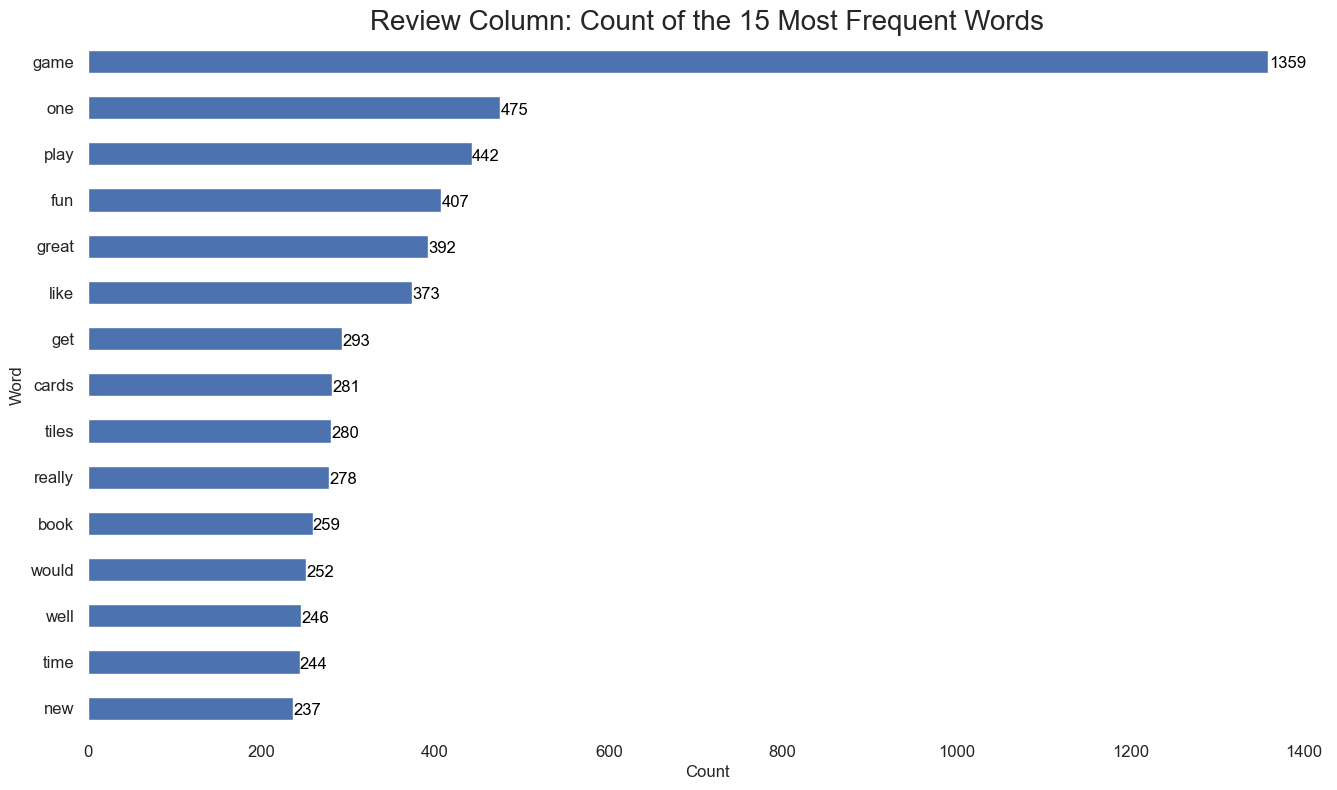

In [95]:
#visualising the most common words in the review column:

ax= review_counts_sorted.plot(kind='barh', figsize=(16,9),fontsize=12,legend=False)

ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize= 12)
ax.set_title('Review Column: Count of the 15 Most Frequent Words', fontsize=20)
ax.patch.set_facecolor('white')

for i in ax.patches:
    ax.text(i.get_width()+ .41, i.get_y()+ .1, str(round((i.get_width()),2)),fontsize=12, color='black')

Let's do the same for the summary column:

In [98]:
summary_counts= pd.DataFrame(Counter(all_summary_tokens2).most_common(15),
                     columns=['Word','Frequency']).set_index('Word')

In [99]:
summary_counts

,Frequency
Word,
game,268
great,237
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


In [100]:
summary_counts_sorted = summary_counts.sort_values(by='Frequency', ascending=True)

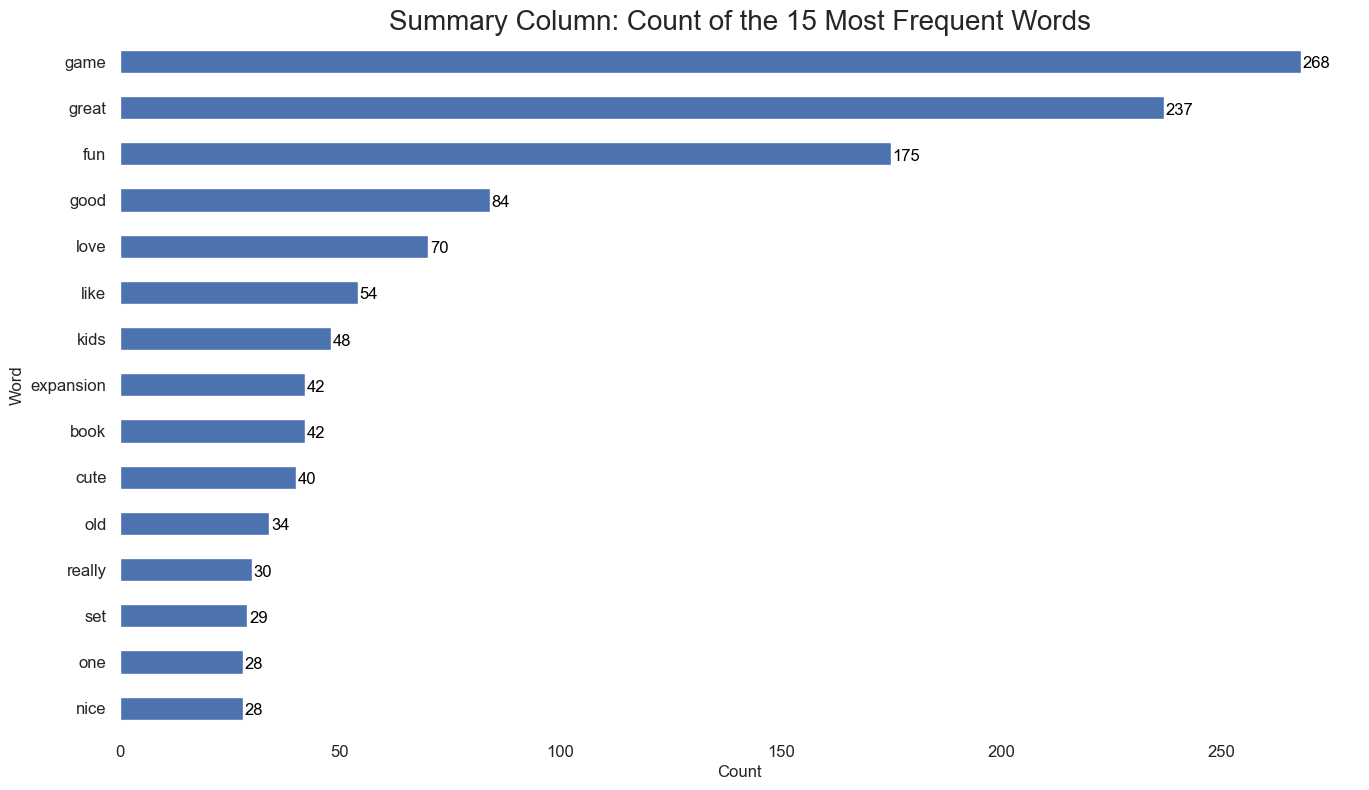

In [102]:
ax= summary_counts_sorted.plot(kind='barh', figsize=(16,9),fontsize=12,legend=False)

ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize= 12)
ax.set_title('Summary Column: Count of the 15 Most Frequent Words', fontsize=20)
ax.patch.set_facecolor('white')

for i in ax.patches:
    ax.text(i.get_width()+ .41, i.get_y()+ .1, str(round((i.get_width()),2)),fontsize=12, color='black')

We can see from the above some of the most common words in the 'review' and 'summary' columns: this could already steer which words the marketing team search for and tag in their online posts. 

## Sentiment Analysis

As a next step, we are going to look at the polarity and sentiment of the words used. If we can detect trends around positive and/or negative sentiments, this could provide us insights into what to leverage and what to focus on improving.

In [107]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [108]:
# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

First, let's run a sentiment analysis on the top words that we identifed for each column, starting with reviews. Let's remind ourselves what this DataFrame looks like:

In [109]:
review_counts.head()

,Frequency
Word,
game,1359
one,475
play,442
fun,407
great,392


We want the words to be in a column rather than the index, so let's fix that first:

In [110]:
review_counts = review_counts.reset_index()

In [111]:
review_counts.head()

,Word,Frequency
0,game,1359
1,one,475
2,play,442
3,fun,407
4,great,392


In [112]:
# Now we tokenize the words in the 'Word' column:

review_words_tokenized = [word_tokenize(_) for _ in review_counts['Word']]

In [113]:
# Interate over the tokenized words to create a dictionary:

df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in review_words_tokenized}

In [114]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the word from the 'Words' column
# We can see some of the highly positive words. 
polarity = pd.DataFrame(df_polarity).T

# View the DataFrame.
polarity.head()

,neg,neu,pos,compound
game,0.0,1.0,0.0,0.0000
one,0.0,1.0,0.0,0.0000
play,0.0,0.0,1.0,0.3400
fun,0.0,0.0,1.0,0.5106
great,0.0,0.0,1.0,0.6249


In [115]:
# Get the top 10 most positive words: 
polarity.sort_values('pos', ascending=0).head(10)

,neg,neu,pos,compound
play,0.0,0.0,1.0,0.3400
fun,0.0,0.0,1.0,0.5106
great,0.0,0.0,1.0,0.6249
like,0.0,0.0,1.0,0.3612
well,0.0,0.0,1.0,0.2732
game,0.0,1.0,0.0,0.0000
one,0.0,1.0,0.0,0.0000
get,0.0,1.0,0.0,0.0000
cards,0.0,1.0,0.0,0.0000
tiles,0.0,1.0,0.0,0.0000


In [116]:
# Get the top 10 most negative words.
polarity.sort_values('neg', ascending=0).head(10)

,neg,neu,pos,compound
game,0.0,1.0,0.0,0.0000
one,0.0,1.0,0.0,0.0000
play,0.0,0.0,1.0,0.3400
fun,0.0,0.0,1.0,0.5106
great,0.0,0.0,1.0,0.6249
like,0.0,0.0,1.0,0.3612
get,0.0,1.0,0.0,0.0000
cards,0.0,1.0,0.0,0.0000
tiles,0.0,1.0,0.0,0.0000
really,0.0,1.0,0.0,0.0000


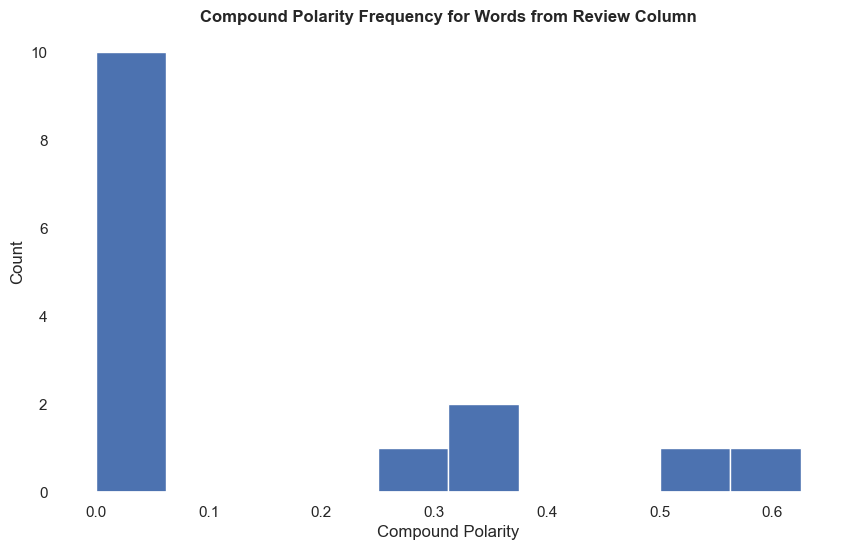

In [118]:
# Visualising as a histogram:
    
data = polarity['compound']
 
# create histogram
fig, ax = plt.subplots()

plt.hist(data)

plt.xlabel('Compound Polarity')
plt.ylabel('Count')
 
plt.title('Compound Polarity Frequency for Words from Review Column',
          fontweight = "bold")

ax.set_facecolor('white')

# display histogram
plt.show()

The above visualisation shows us that, of the 15 most common words, 10 had a neutral sentiment, 3 were slightly positive and 2 were positive (although none were emphatically positive). There were no negative words. 

Let's do the same for the 'summary' column words:

In [119]:
summary_counts = summary_counts.reset_index()

In [120]:
# Now we tokenize the words in the 'Word' column:

summary_words_tokenized = [word_tokenize(_) for _ in summary_counts['Word']]

In [121]:
# Interate over the tokenized words to create a dictionary:

df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in summary_words_tokenized}

In [122]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the word from the 'Words' column
# We can see some of the highly positive words. 
polarity = pd.DataFrame(df_polarity).T

# View the DataFrame.
polarity.head()

,neg,neu,pos,compound
game,0.0,1.0,0.0,0.0000
great,0.0,0.0,1.0,0.6249
fun,0.0,0.0,1.0,0.5106
good,0.0,0.0,1.0,0.4404
love,0.0,0.0,1.0,0.6369


In [123]:
# Get the top 5 most positive words: 
polarity.sort_values('pos', ascending=0).head()

,neg,neu,pos,compound
great,0.0,0.0,1.0,0.6249
fun,0.0,0.0,1.0,0.5106
good,0.0,0.0,1.0,0.4404
love,0.0,0.0,1.0,0.6369
like,0.0,0.0,1.0,0.3612


In [124]:
# Get the top 5 most negative words.
polarity.sort_values('neg', ascending=0).head()

,neg,neu,pos,compound
game,0.0,1.0,0.0,0.0000
great,0.0,0.0,1.0,0.6249
fun,0.0,0.0,1.0,0.5106
good,0.0,0.0,1.0,0.4404
love,0.0,0.0,1.0,0.6369


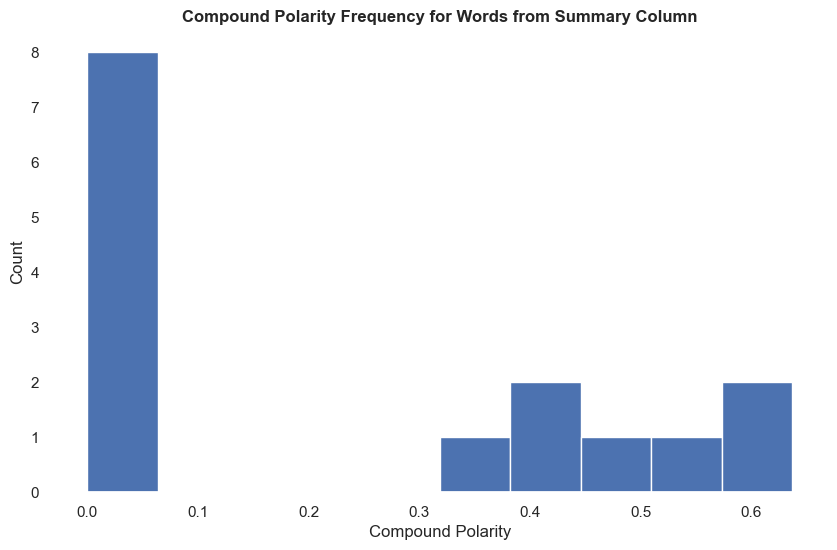

In [126]:
# Visualising as a histogram:
    
data = polarity['compound']
 
# create histogram
fig, ax = plt.subplots()

plt.hist(data)

plt.xlabel('Compound Polarity')
plt.ylabel('Count')
 
plt.title('Compound Polarity Frequency for Words from Summary Column',
          fontweight = "bold")

ax.set_facecolor('white')

# display histogram
plt.show()

The above visualisation shows us that, of the 15 most common words, 8 had a neutral sentiment and the rest were positively-oriented (although none were emphatically positive). There were no negative words. 

We have looked at the word level, but as a next step, let's look at each of the reviews and summaries to assess their sentiment overall and aim to draw out the 20 most positive and 20 most negative reviews.

Let's go back to our original DataFrame:

In [127]:
text.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [128]:
# Now we tokenize the words in the 'review' column:

review_column_tokenized = [word_tokenize(_) for _ in text['review']]

In [129]:
#importing required libraries

import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [130]:
# Getting a list of all english words so we can exclude anything that doesn't appear on the list.
all_english_words = set(words.words())

# View results.
all_english_words

{'rhopalium',
 'intracutaneous',
 'observer',
 'quinoidation',
 'say',
 'pectus',
 'Gephyrea',
 'twinhood',
 'reapposition',
 'typecast',
 'webby',
 'Seder',
 'coccerin',
 'isochrone',
 'glomeroporphyritic',
 'unpertaining',
 'prediscussion',
 'chilver',
 'Merlucciidae',
 'reverseless',
 'afternote',
 'valedictorily',
 'inexposable',
 'enchasten',
 'Molluscoida',
 'nonrevival',
 'reintercession',
 'sympatheticotonic',
 'nervate',
 'inexplicability',
 'kola',
 'filmdom',
 'Mustelidae',
 'alsweill',
 'premortuary',
 'mesoplastral',
 'gabbro',
 'varletaille',
 'coracoradialis',
 'mismeasure',
 'telegraphee',
 'wander',
 'argo',
 'arsenotungstates',
 'hideously',
 'bunya',
 'Gaullism',
 'Lacerta',
 'encallow',
 'pneumohydropericardium',
 'Wraf',
 'unknot',
 'uncivilly',
 'hexahydrate',
 'anhydremia',
 'phoranthium',
 'perfidiousness',
 'bugbite',
 'cystostomy',
 'mythopoetize',
 'silo',
 'protozoic',
 'bazaar',
 'cromfordite',
 'lucernal',
 'microseismology',
 'indecipherableness',
 'phyto

In [131]:
# Pre-processing: iterating over every word, converting it to lowercase, 
# only including it if it's alphanumeric and if it is in the list of English words, but not a stopword:

df = [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words] for x in review_column_tokenized]

In [132]:
# Running a dictionary comprehension to take every cleaned comment
# Next, running the polarity score function on the string.

df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df}

In [133]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned review.

polarity = pd.DataFrame(df_polarity).T

# View the DataFrame.
polarity

,neg,neu,pos,compound
comes screen space screen absolute premium fact space wasted art terribly informative art well completely useless reason gave technically speaking least still stand block dice ball completely,0.347,0.596,0.057,-0.8932
open letter unpainted bad spell great board however terrible still waiting single screen polluted pointless useful tables youve single use screen useful running storm thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted bloated overland map could easily reduced single panel size table short stop making crap,0.218,0.494,0.288,0.6908
nice art nice printing two filled general forgotten map beyond one blue ocean waste dont understand cant make useful rather solely specific adventure supposed able transpose adventure outside forgotten even list new would least useful map even would stuff related running game stuff related thing curse make useful raven loft undead horror general instead huge amount screen space solely castle useful small fraction time even curse adventure let alone various really kill extended use thinking potential use adventure question well use sense rage screen far useful broad dark covering lot various may suffer map one panel storm one decent tables really mark maybe ask would use,0.298,0.570,0.132,-0.9756
amazing buy bought gift new perfect,0.000,0.224,0.776,0.8860
review previous completely unnecessary nearly useless skip definition waste money,0.423,0.577,0.000,-0.7063
...,...,...,...,...
fun card game people like letter absolutely beautiful try,0.000,0.375,0.625,0.8748
fun family make certain agree dictionary front big difference,0.000,0.432,0.568,0.7845
great game keep mind active play year old dont adhere strictly sometimes help rearrange get higher everyone higher strategy remember bonus work,0.000,0.525,0.475,0.9371
retired find great way stay alert spelling vocabulary also need use math keep score great game brain,0.000,0.574,0.426,0.8860


In [134]:
# The top twenty most positive (cleaned) reviews:
polarity.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
fun gift,0.0,0.000,1.000,0.7351
entertaining,0.0,0.000,1.000,0.4404
love,0.0,0.000,1.000,0.6369
gift,0.0,0.000,1.000,0.4404
fun,0.0,0.000,1.000,0.5106
easy,0.0,0.000,1.000,0.4404
great,0.0,0.000,1.000,0.6249
cute,0.0,0.000,1.000,0.4588
perfect,0.0,0.000,1.000,0.5719
gorgeous love book beautiful,0.0,0.076,0.924,0.9201


In [135]:
# The top twenty most negative (cleaned) reviews:
polarity.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
cardboard ghost original hard believe shame disgusting,0.703,0.138,0.159,-0.7845
incomplete kit disappointing,0.615,0.385,0.000,-0.4939
anger way discuss anger repetitive start get half round,0.610,0.390,0.000,-0.8555
never get old great toy great delivery,0.569,0.431,0.000,-0.7641
cant wait use love,0.529,0.471,0.000,-0.5216
really like game recognize anger talk difficult,0.477,0.308,0.215,-0.5279
kind difficult play arent clear like easier play understand,0.472,0.103,0.424,0.0191
tough get comes die roll like game,0.454,0.336,0.210,-0.4404
review previous completely unnecessary nearly useless skip definition waste money,0.423,0.577,0.000,-0.7063
great anger management,0.420,0.114,0.466,0.1027


In [136]:
# Let's take a look at the descriptive statistics for the compound score:

polarity['compound'].describe()

count    1348.000000
mean        0.635067
std         0.398043
min        -0.975600
25%         0.510600
50%         0.778500
75%         0.913600
max         0.998700
Name: compound, dtype: float64

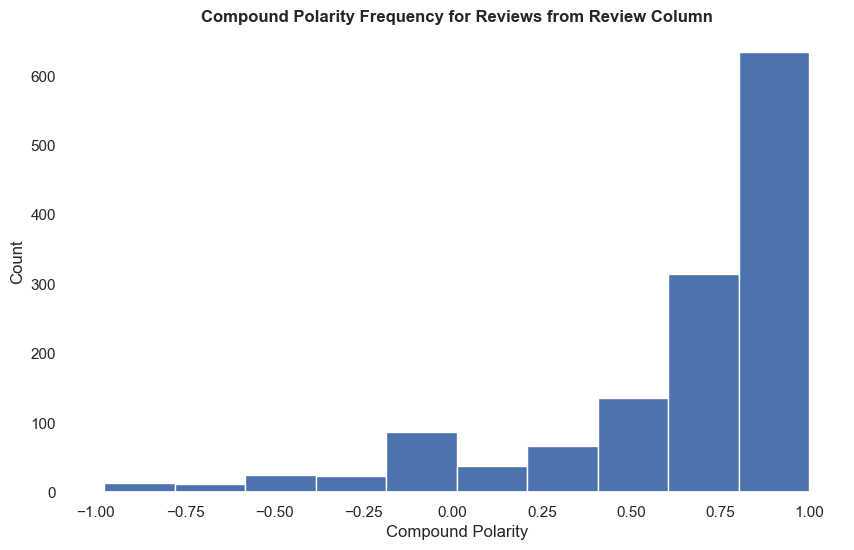

In [137]:
# Visualising as a histogram:
    
data = polarity['compound']
 
# create histogram
fig, ax = plt.subplots()

plt.hist(data)

plt.xlabel('Compound Polarity')
plt.ylabel('Count')
 
plt.title('Compound Polarity Frequency for Reviews from Review Column',
          fontweight = "bold")

ax.set_facecolor('white')

# display histogram
plt.show()

We can now do the same for the 'comments' column:

In [138]:
# Now we tokenize the words in the 'summary' column:

summary_column_tokenized = [word_tokenize(_) for _ in text['summary']]

In [139]:
# Pre-processing: iterating over every word, converting it to lowercase, 
# only including it if it's alphanumeric and if it is in the list of English words, but not a stopword:

df2 = [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words] for x in summary_column_tokenized]

In [140]:
# Running a dictionary comprehension to take every cleaned comment
# Next, running the polarity score function on the string.

df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df2}

In [141]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned review.

polarity = pd.DataFrame(df_polarity).T

# View the DataFrame.
polarity

,neg,neu,pos,compound
fact space wasted art terribly informative art,0.576,0.424,0.000,-0.7783
another worthless dungeon screen,0.492,0.508,0.000,-0.4404
pretty also pretty useless,0.275,0.098,0.627,0.5574
five,0.000,1.000,0.000,0.0000
money trap,0.697,0.303,0.000,-0.3182
...,...,...,...,...
fun card game people like,0.000,0.341,0.659,0.7003
sort card game equivalent scrabble lot easier,0.000,0.682,0.318,0.4215
great game keep mind active,0.000,0.306,0.694,0.7783
great mind game,0.000,0.328,0.672,0.6249


In [142]:
# The top twenty most positive (cleaned) summaries:
polarity.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
fun,0.0,0.0,1.0,0.5106
delight,0.0,0.0,1.0,0.5994
excited,0.0,0.0,1.0,0.3400
happy gift,0.0,0.0,1.0,0.7650
easily,0.0,0.0,1.0,0.3400
love like,0.0,0.0,1.0,0.7717
entertaining,0.0,0.0,1.0,0.4404
gift,0.0,0.0,1.0,0.4404
yeah,0.0,0.0,1.0,0.2960
fun play,0.0,0.0,1.0,0.6908


In [143]:
# The top twenty most negative (cleaned) reviews:
polarity.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
disappointed,1.000,0.000,0.000,-0.4767
defective poor,1.000,0.000,0.000,-0.7184
worn,1.000,0.000,0.000,-0.2960
bad,1.000,0.000,0.000,-0.5423
boring,1.000,0.000,0.000,-0.3182
disappointing,1.000,0.000,0.000,-0.4939
fight,1.000,0.000,0.000,-0.3818
angry,1.000,0.000,0.000,-0.5106
sided die,0.796,0.204,0.000,-0.5994
mad dragon,0.762,0.238,0.000,-0.4939


In [144]:
# Let's take a look at the descriptive statistics for the compound score:

polarity['compound'].describe()

count    1165.000000
mean        0.378276
std         0.343531
min        -0.784500
25%         0.000000
50%         0.493900
75%         0.624900
max         0.952400
Name: compound, dtype: float64

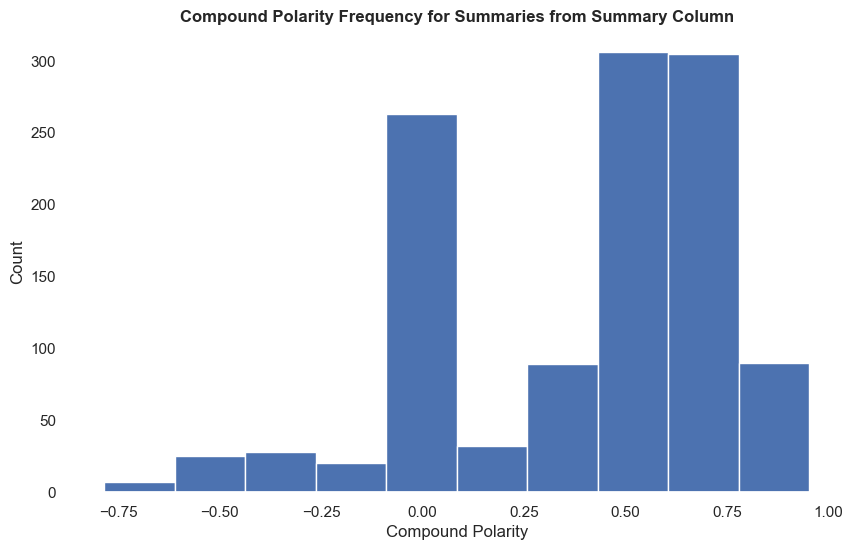

In [145]:
# Visualising as a histogram:
    
data = polarity['compound']
 
# create histogram
fig, ax = plt.subplots()

plt.hist(data)

plt.xlabel('Compound Polarity')
plt.ylabel('Count')
 
plt.title('Compound Polarity Frequency for Summaries from Summary Column',
          fontweight = "bold")

ax.set_facecolor('white')

# display histogram
plt.show()

## Summary of findings from sentiment analysis

Overall, the sentiment analysis suggests that there is generally positive sentiment towards the business: the mean compound score from the 'reviews' analysis was 0.64, which shows the reviews were generally quite positively orientated, without being emphatically so; and the standard deviation was 0.40, suggesting that sentiment does vary across the dataset. The 50% percentile score was 0.78, showing that over half of the compound scores were higher than this, reflecting a good proportion of positive sentiment. 

The mean compound score from the 'summary' analysis was 0.38, still showing a positive orientation, albeit not as pronounced as for the reviews; and the standard deviation of 0.34 suggests again that there is a range of sentiment. Here, the 50th percentile was 0.49, showing that not such a high proportion fell into the higher score when compared with the reviews. 

Overall, there is more positive than negative sentiment towards the company in both the reviews and the summaries. 